# Init

## Imports

In [8]:
from utils import Preprocess
from utils.preprocess import MissingValue
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Import Dataset

In [2]:
df = pd.read_excel('dataset.xlsx',engine='openpyxl').drop(['Unnamed: 0', 'visit id'], axis=1)

# PreProcess

In [4]:
preprocessed_df = Preprocess(dataframe=df, missing_value_per=0.5, variance_threshold=0.1,min_null_per=0.7)
preprocessed_df.apply()
preprocessed_df = preprocessed_df.dataframe

In [5]:
preprocessed_df.describe()

immuno status  resp rate max  bp diastolic diff  bp systolic diff  \
count    1920.000000    1177.000000        1239.000000       1239.000000   
mean        0.158333      -0.316753          -0.752255         -0.727833   
std         0.365148       0.402675           0.364080          0.408769   
min         0.000000      -1.000000          -1.000000         -1.000000   
25%         0.000000      -0.575758          -1.000000         -1.000000   
50%         0.000000      -0.454545          -1.000000         -0.987730   
75%         0.000000      -0.212121          -0.565217         -0.558282   
max         1.000000       1.000000           1.000000          1.000000   

       heart rate diff  resp rate diff    temp diff  #bp diastolic diff rel  \
count      1240.000000     1177.000000  1231.000000             1240.000000   
mean         -0.754100       -0.703683    -0.770338               -0.786997   
std           0.366349        0.482097     0.319001                0.324754   
min          -1.000000       -1.000000    -1.000000               -1.000000   
25%          -1.000000       -1.000000    -1.000000               -1.000000   
50%          -0.984733       -1.000000    -0.976190               -1.000000   
75%          -0.541985       -0.647059    -0.595238               -0.645482   
max           1.000000        1.000000     1.000000                1.000000   

       bp systolic diff rel  resp rate diff rel  #temp diff rel  \
count           1240.000000         1177.000000     1231.000000   
mean              -0.715950           -0.719147       -0.771327   
std                0.419103            0.446600        0.317694   
min               -1.000000           -1.000000       -1.000000   
25%               -1.000000           -1.000000       -1.000000   
50%               -0.984944           -1.000000       -0.975924   
75%               -0.522176           -0.634409       -0.594677   
max                1.000000            1.000000        1.000000   

       observation window  
count         1925.000000  
mean             6.000000  
std              2.829162  
min              2.000000  
25%              4.000000  
50%              6.000000  
75%              8.000000  
max             10.000000

# Missing Value

## Columns With Most Missing Values

- as you see most of the columns include more than 1000 missing values, which can be challenging

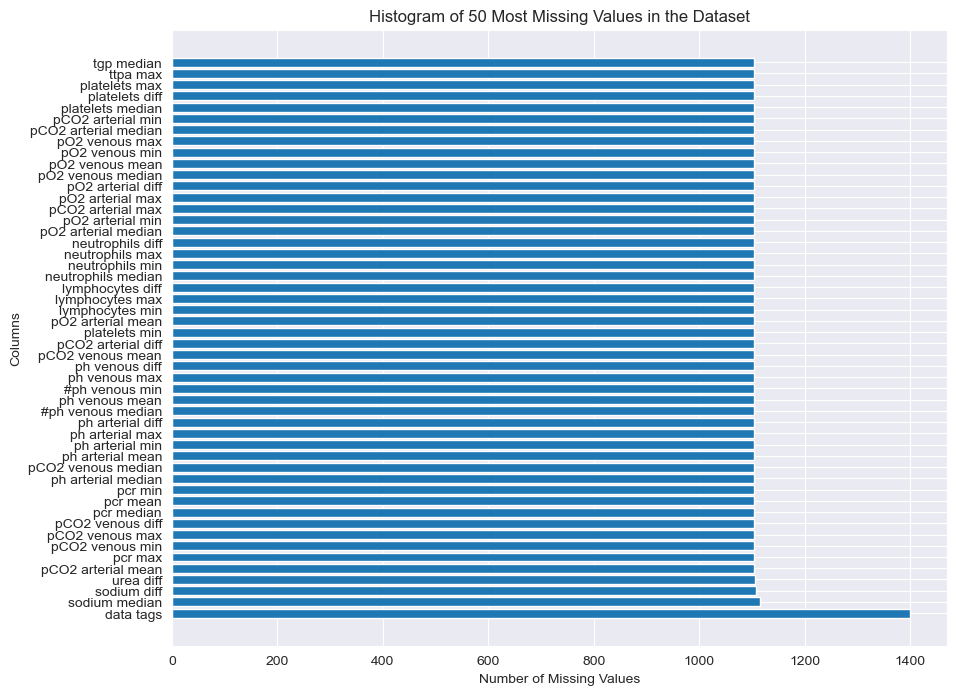

In [27]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values = missing_values.sort_values(ascending=False)
missing_values = missing_values[:50]

plt.figure(figsize=(10, 8))
plt.barh(missing_values.index, missing_values.values)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Histogram of 50 Most Missing Values in the Dataset')
plt.show()


## Distribution of Missing Values
- according to chart, we have almost 175 columns 1000 to 1100 missing values, this suggests that many columns can be challenging to fill, considering we are dealing medical dataset.

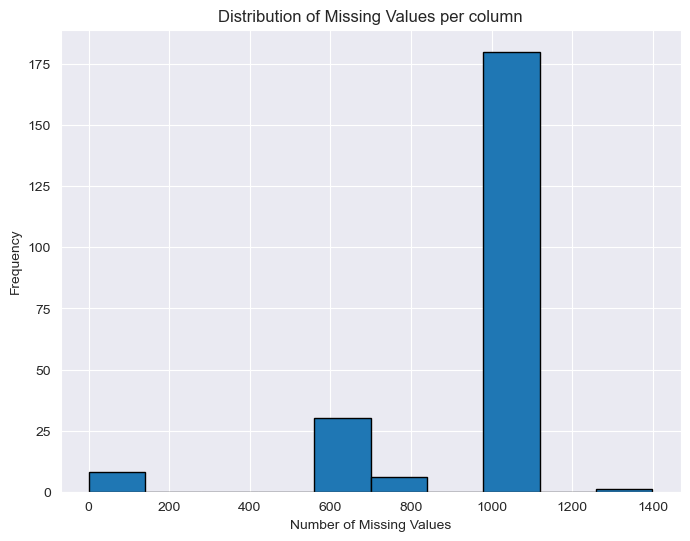

In [10]:
missing_per_row = df.isnull().sum()

# Plot the distribution of missing values per row
plt.figure(figsize=(8, 6))
plt.hist(missing_per_row, bins=10, edgecolor='black')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.title('Distribution of Missing Values per column')
plt.show()


## Filling Missing Values

In [6]:
m = MissingValue(preprocessed_df)
preprocessed_df = m.fill_dataframe()

In [29]:
preprocessed_df.isna()

age more than 65    age  gender  hypertension  immuno status  \
0                False  False   False         False          False   
1                False  False   False         False          False   
2                False  False   False         False          False   
3                False  False   False         False          False   
4                False  False   False         False          False   
...                ...    ...     ...           ...            ...   
1920             False  False   False         False          False   
1921             False  False   False         False          False   
1922             False  False   False         False          False   
1923             False  False   False         False          False   
1924             False  False   False         False          False   

      other conditions  resp rate max  bp diastolic diff  bp systolic diff  \
0                False          False              False             False   
1                False          False              False             False   
2                False          False              False             False   
3                False          False              False             False   
4                False          False              False             False   
...                ...            ...                ...               ...   
1920             False          False              False             False   
1921             False          False              False             False   
1922             False          False              False             False   
1923             False          False              False             False   
1924             False          False              False             False   

      heart rate diff  resp rate diff  temp diff  #bp diastolic diff rel  \
0               False           False      False                   False   
1               False           False      False                   False   
2               False           False      False                   False   
3               False           False      False                   False   
4               False           False      False                   False   
...               ...             ...        ...                     ...   
1920            False           False      False                   False   
1921            False           False      False                   False   
1922            False           False      False                   False   
1923            False           False      False                   False   
1924            False           False      False                   False   

      bp systolic diff rel  resp rate diff rel  #temp diff rel  \
0                    False               False           False   
1                    False               False           False   
2                    False               False           False   
3                    False               False           False   
4                    False               False           False   
...                    ...                 ...             ...   
1920                 False               False           False   
1921                 False               False           False   
1922                 False               False           False   
1923                 False               False           False   
1924                 False               False           False   

      observation window  target label / yes no  
0                  False                  False  
1                  False                  False  
2                  False                  False  
3                  False                  False  
4                  False                  False  
...                  ...                    ...  
1920               False                  False  
1921               False                  False  
1922               False                  False  
1923               Fal

# Feature Distributions Analysis

## Some Selected Features After Preprocess and Filling Missing Values
- according to chart, some columns may have small percentage of outliers
- this can be very effective to final results, considering that we should fill the missing data too
- but in out case because we have used multiple technique for filling missing values, and the missing value techniques are applied each column specifically, the outliers won't affect our final result

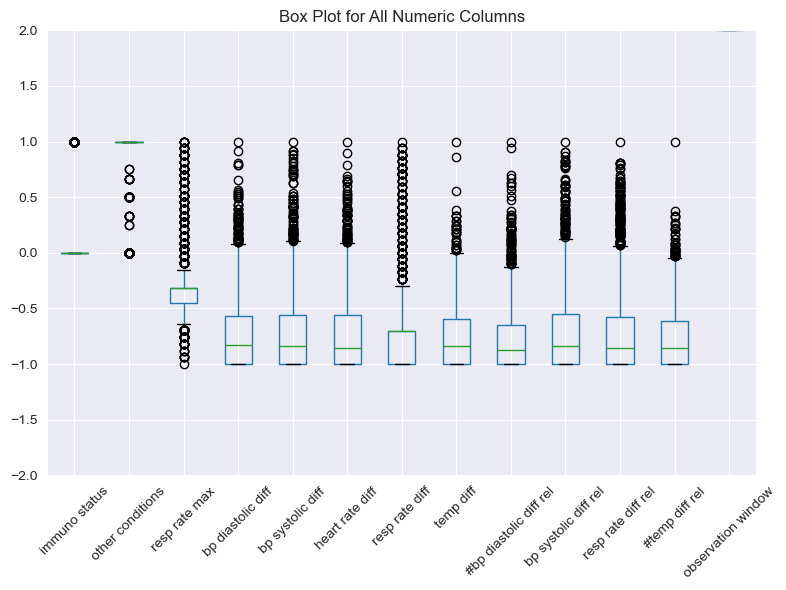

In [32]:
plt.figure(figsize=(8, 6))
preprocessed_df.boxplot()
plt.title('Box Plot for All Numeric Columns')
plt.xticks(rotation=45)
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()

## Distribution of All Selected Features
**Summary of Key Insights From Below Charts:**
- Majority of Examined Patients were Below 65
- Age chart Represents a Uniform Distribution, which is not quite right because the values were mapped
- Majority of Examined Patients were Men(considering 0 as men)
- Most of the Examined Patients Already had Other Conditions
- also Observation Windows were almost equally Distributed

In [33]:
def plot_column_distributions(df, unique_value_threshold=10):
    num_columns = len(df.columns)
    num_rows = math.ceil(num_columns / 3)

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        unique_values = df[column].nunique()
        axes[i].set_title(f"Distribution for {column}")
        if unique_values <= unique_value_threshold:
            value_counts = df[column].value_counts()
            axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
            axes[i].axis('equal')
        else:
            sns.histplot(df[column].dropna(), kde=False, bins=20, color='skyblue', ax=axes[i])
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


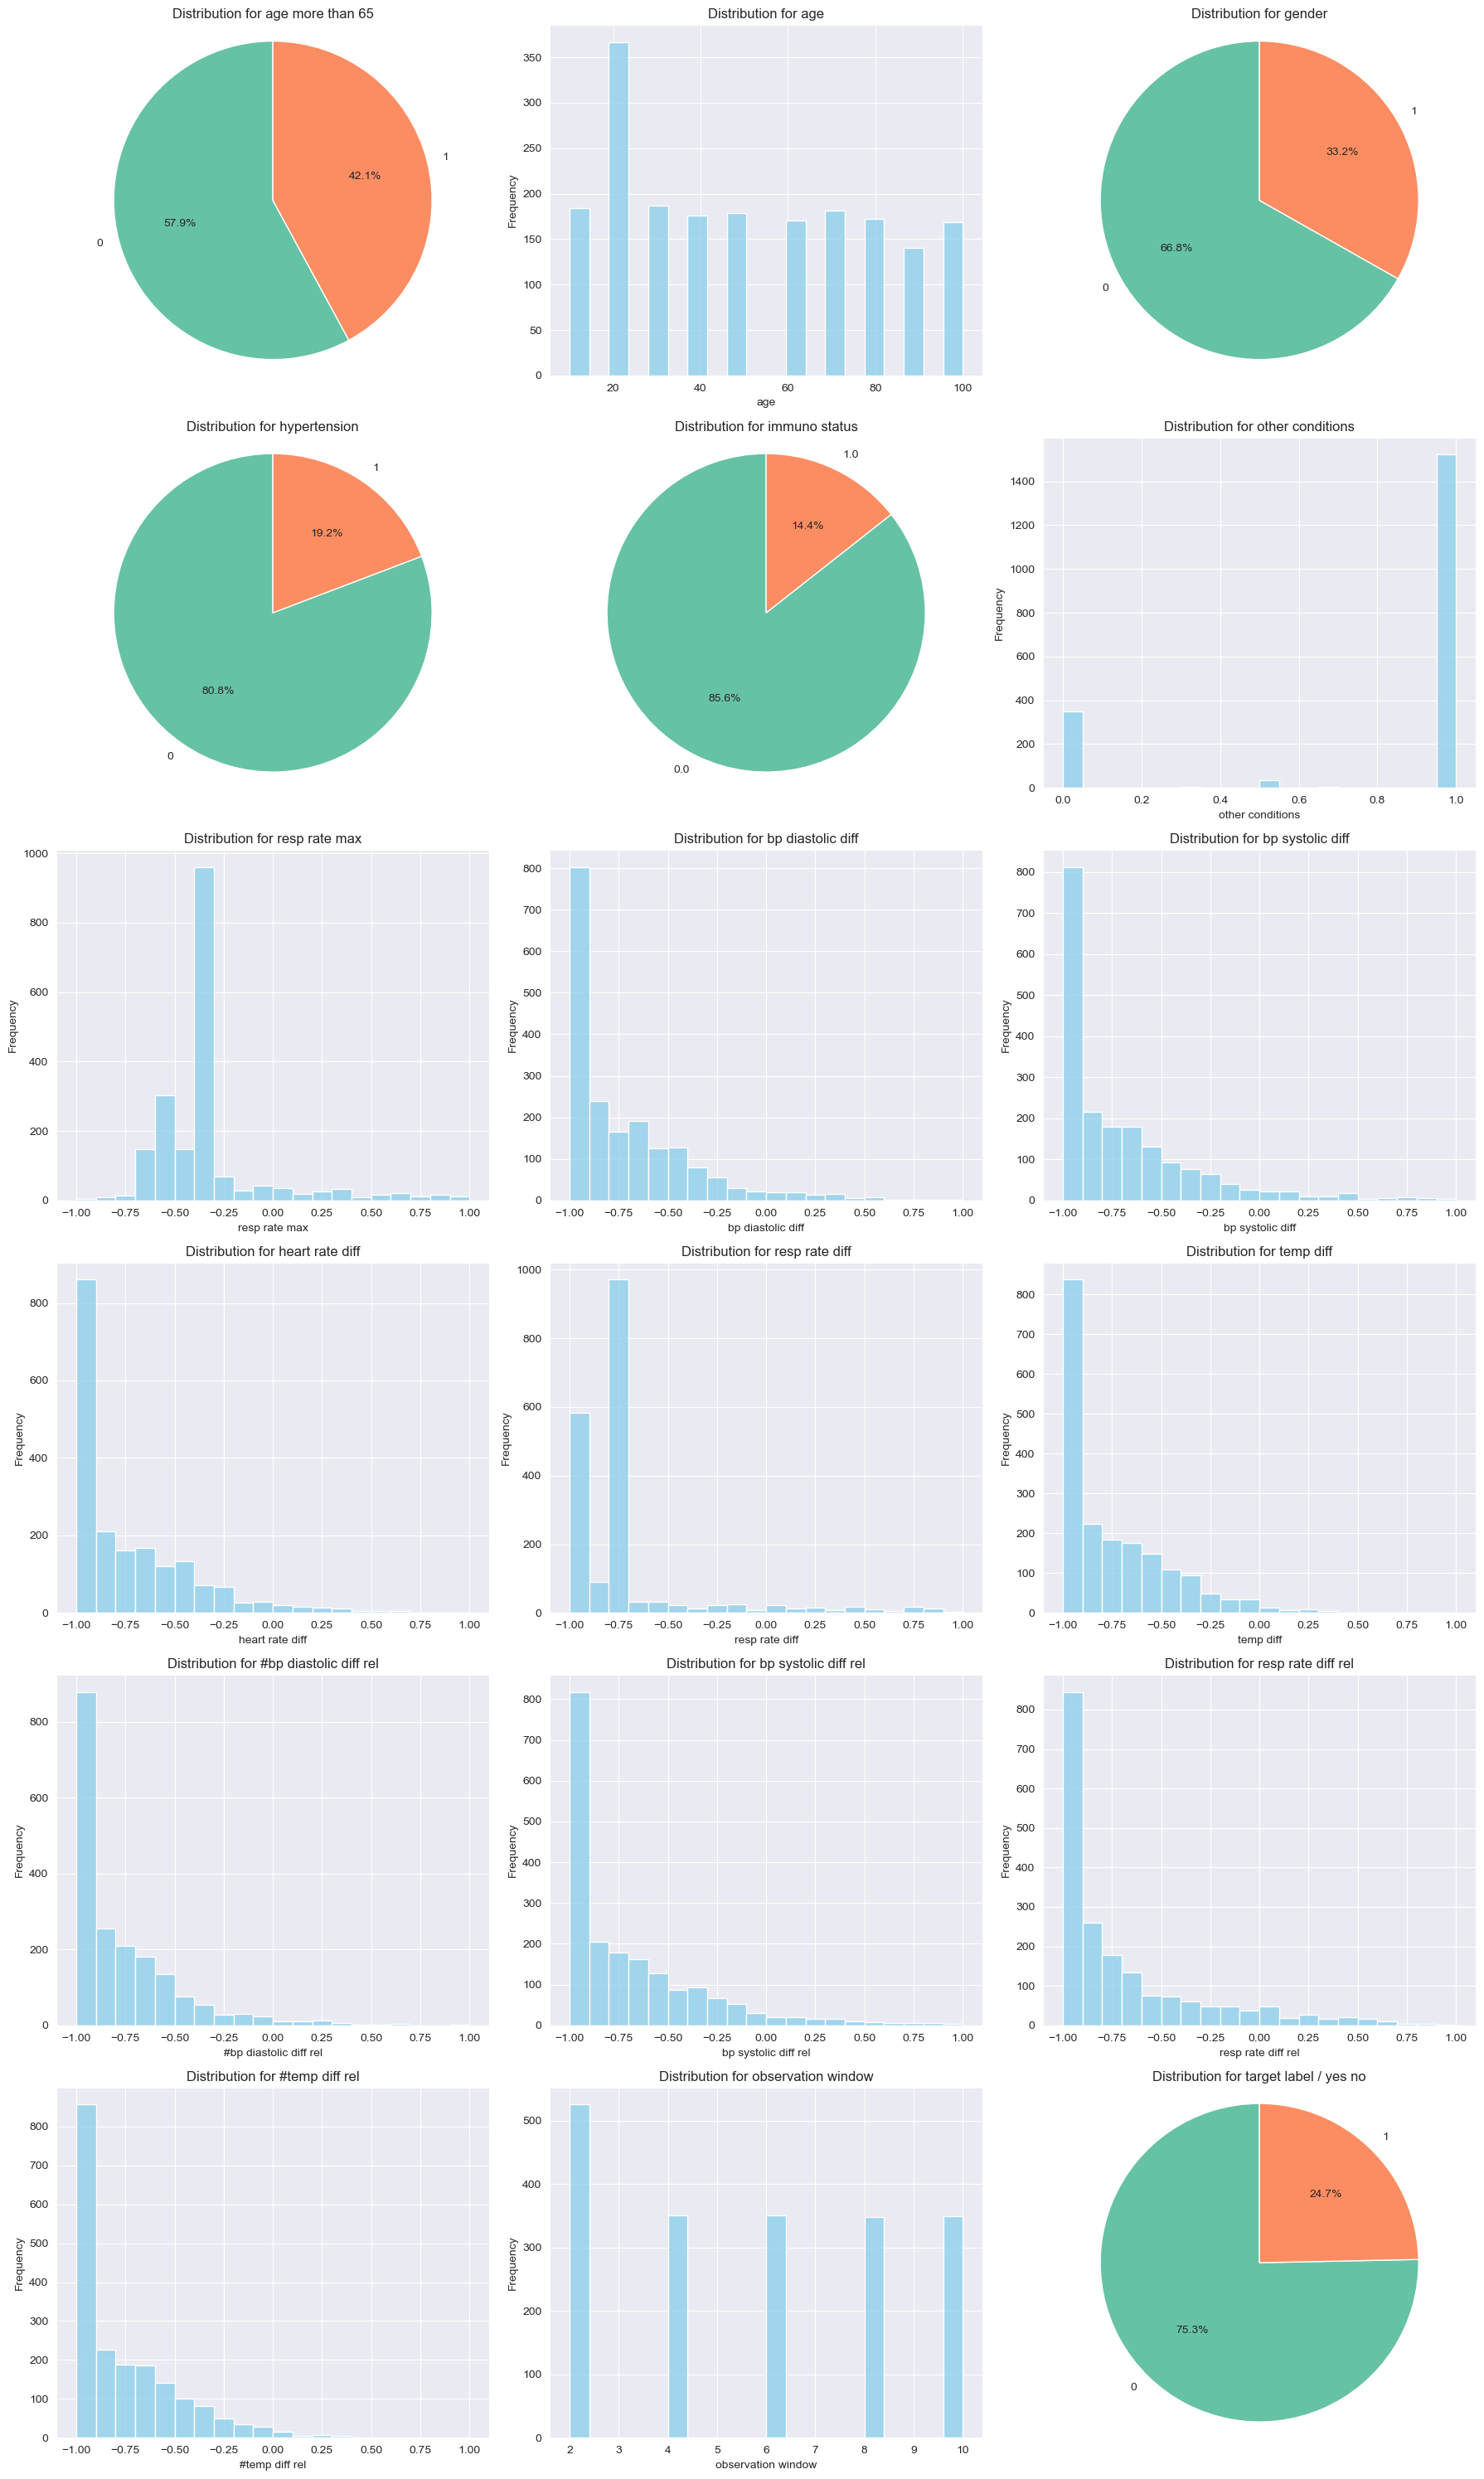

In [36]:
unique_value_threshold = 3
plot_column_distributions(preprocessed_df, unique_value_threshold)

# Multicollinearity

## Correlation Heatmap of Selected Features
- as Correlation heatmap suggests, there are many correlated features
- many of these features are correlated to each other
- you may ask why we should keep all of these features, why we don't remove on of the correlated pairs to achieve faster results?
- the answer is, although we can do this and further investigation showed that the final result can be predicted with two or three features, which is interesting
- further tests showed that this approach is not robust
- considering that the missing values are separated across all features
- so in random selection that test data had more missing values in the selected sections, the final results were not good.
- so keeping these selected features together is a good approach, because it introduces robustness to our model.

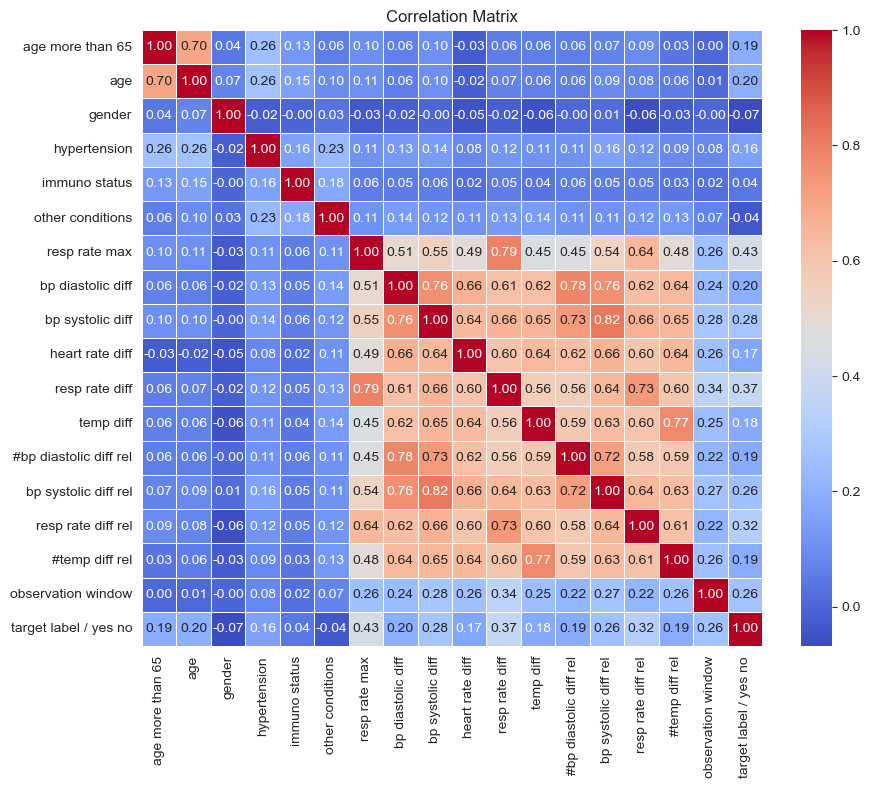

In [56]:
corr_matrix = preprocessed_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Pairwise Plot For Correlated Features

- as you see when two features are highly correlated the distribution of elements are more around y=x axis
- some features can distinguish to features very good like: resp rate diff, resp rate max, temp diff rel, ...

In [57]:
def plot_interesting_pairs(df, target=None, corr_threshold=0.6):
    corr_matrix = df.corr()

    interesting_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > corr_threshold:
                interesting_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

    columns_of_interest = list({col for pair in interesting_pairs for col in pair})

    if target and target in df.columns:
        columns_of_interest.append(target)

    if columns_of_interest:
        sns.pairplot(df[columns_of_interest], hue=target, diag_kind='kde', corner=False)
        plt.show()
    else: 
        print("No interesting pairs found based on the correlation threshold.")

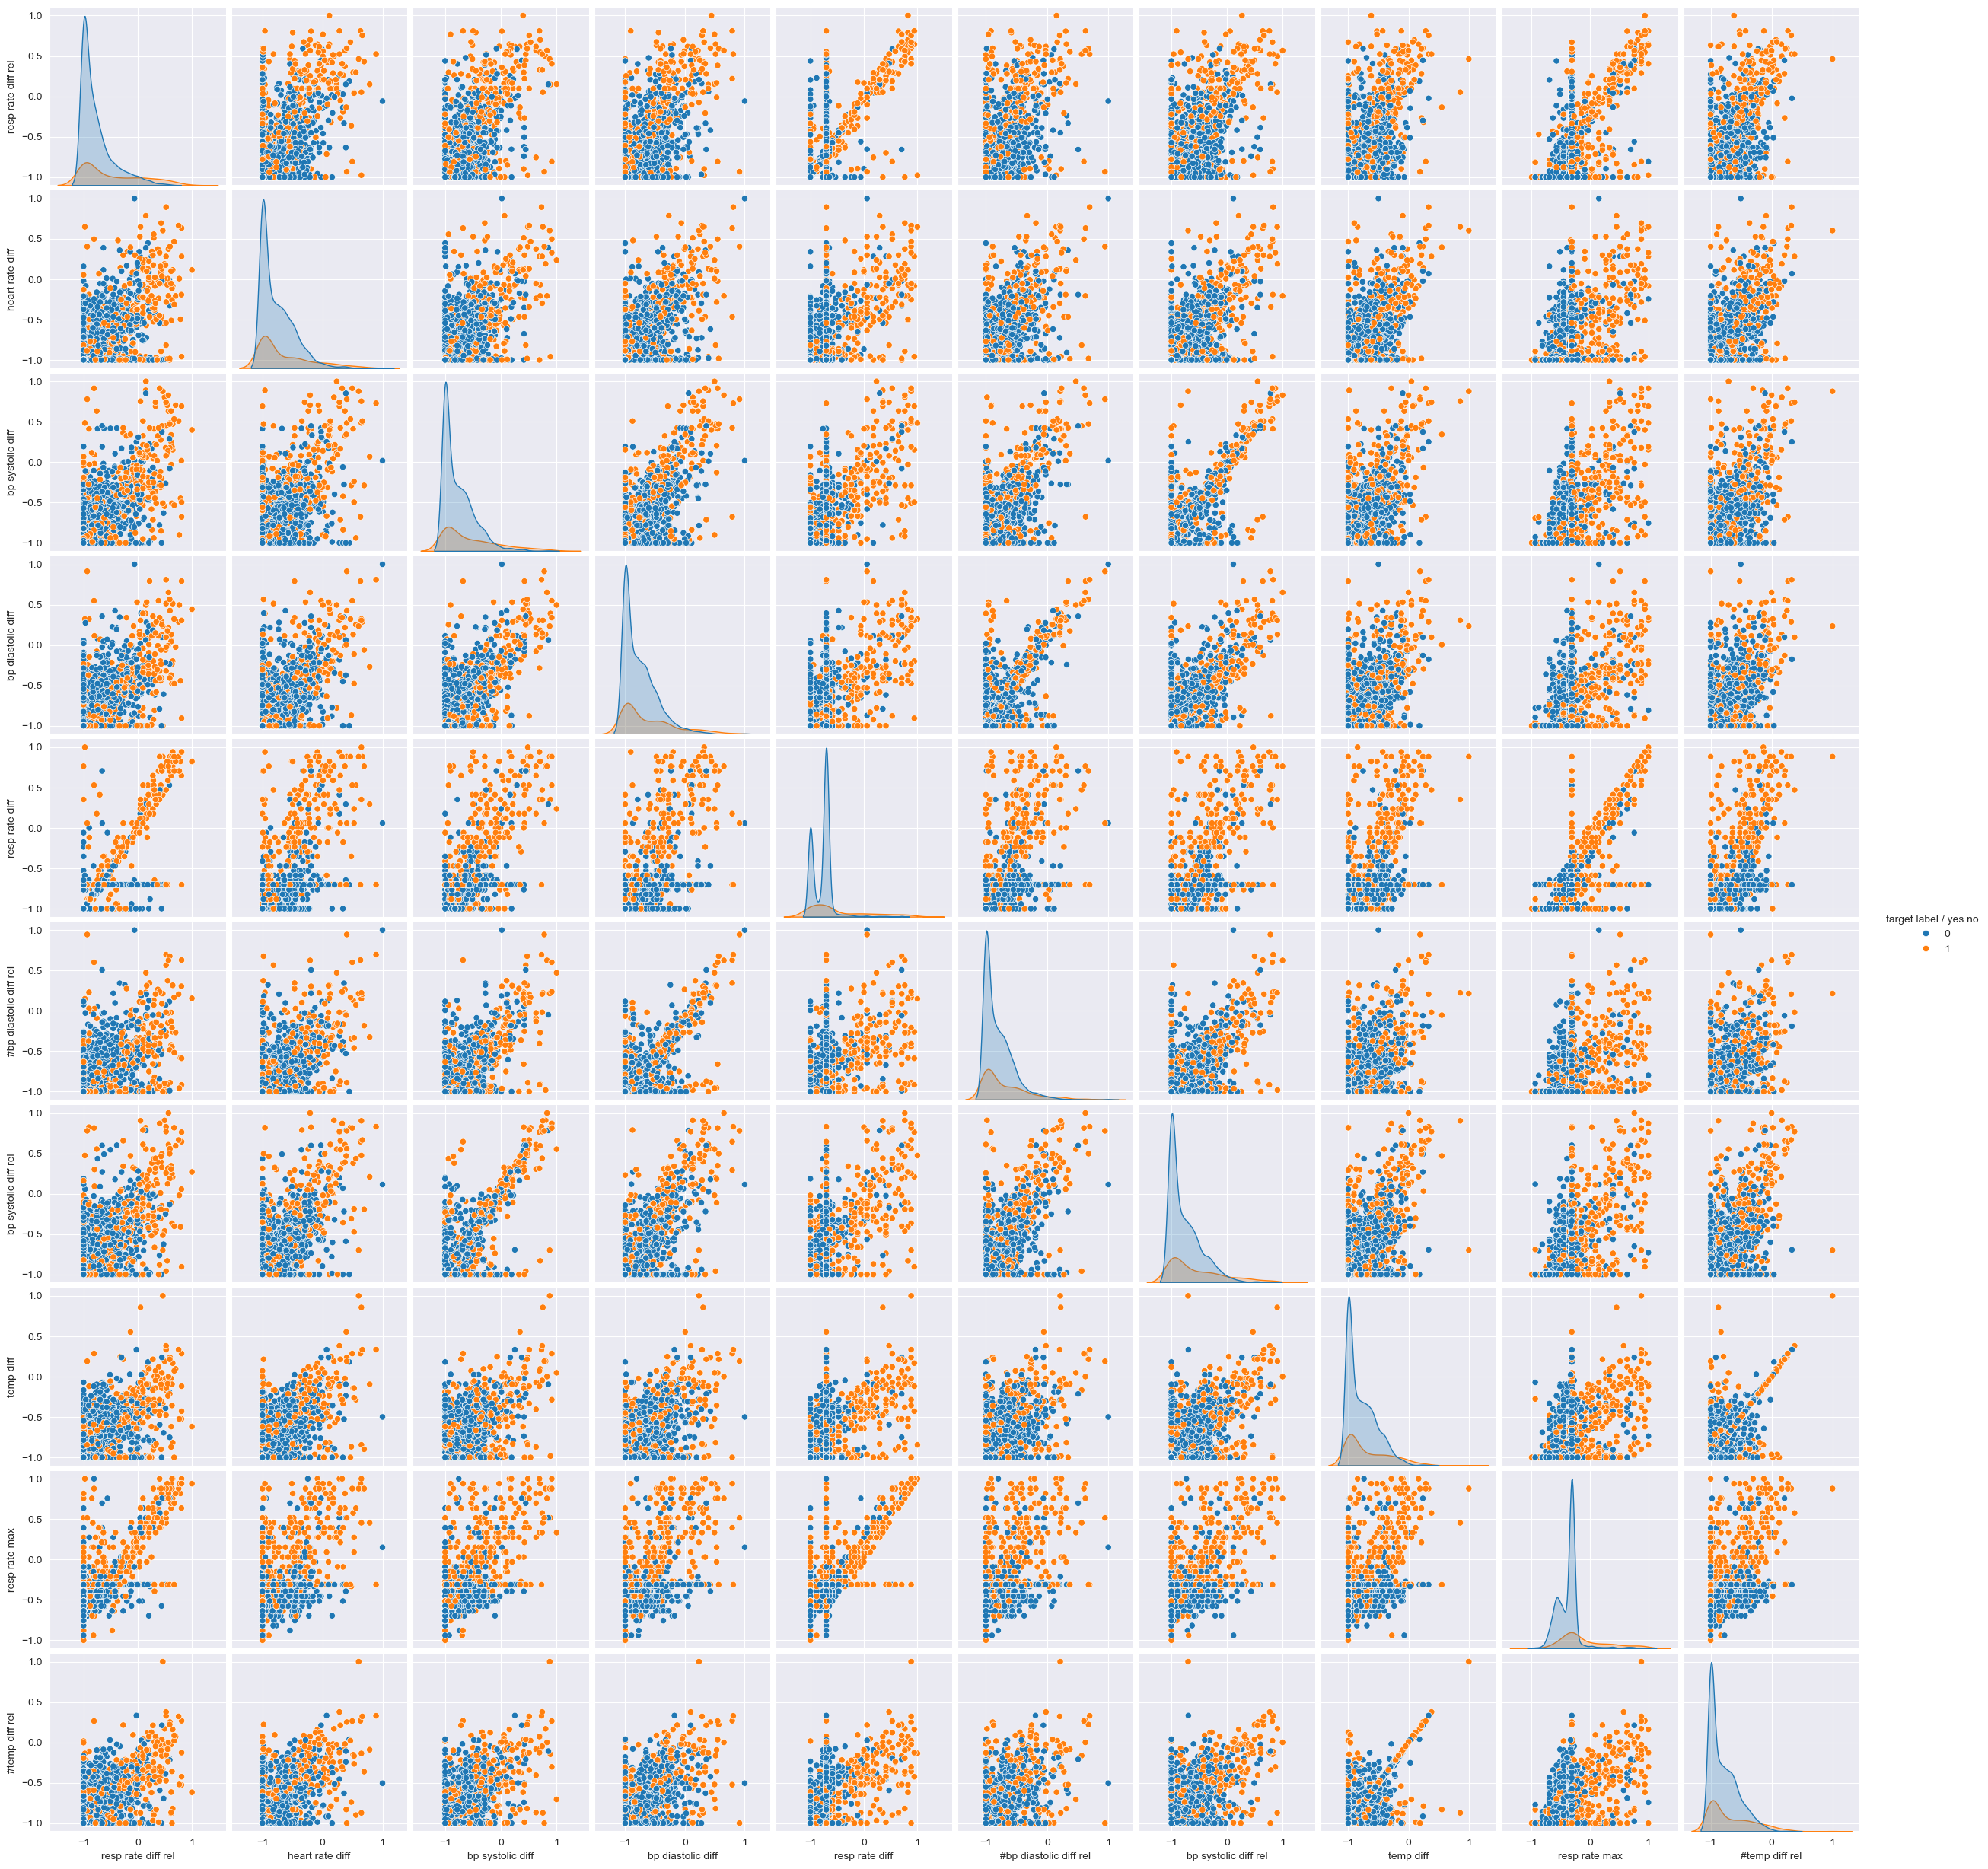

In [58]:
plot_interesting_pairs(preprocessed_df, 'target label / yes no')

# Clustering

## Effective Features for Separating Labels

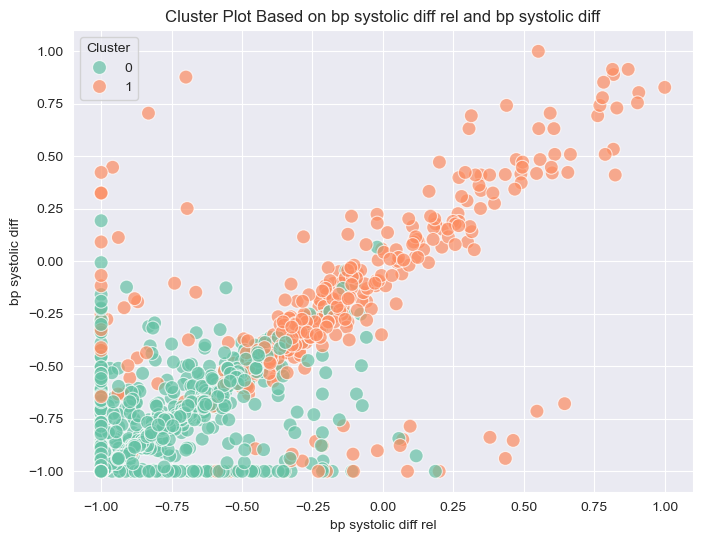

In [61]:
def cluster_and_plot_with_original_features(df, n_clusters=3):
    numerical_columns = df.select_dtypes(include=['number']).columns
    X = df[numerical_columns]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    centroids = kmeans.cluster_centers_
    variances = np.var(centroids, axis=0)
    
    top_two_features = np.argsort(variances)[-2:]
    feature_1 = numerical_columns[top_two_features[0]]
    feature_2 = numerical_columns[top_two_features[1]]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature_1, y=feature_2, hue='Cluster', palette='Set2', s=100, alpha=0.7)

    plt.title(f'Cluster Plot Based on {feature_1} and {feature_2}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.show()
    
cluster_and_plot_with_original_features(preprocessed_df.copy(), n_clusters=2)


# Imbalanced Labels?
- first insight on dataset showed, that target labels, are not balanced
- but after preprocess, the gap was decreased, making it not that effective on results

## Before Preprocess

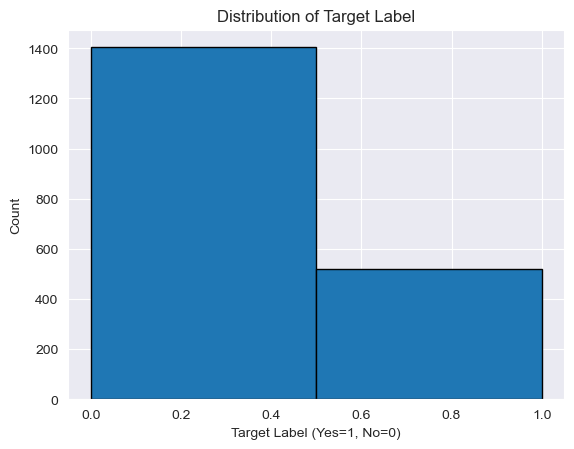

In [9]:
plt.hist(df['target label / yes no'], bins=2, edgecolor='black')
plt.xlabel('Target Label (Yes=1, No=0)')
plt.ylabel('Count')
plt.title('Distribution of Target Label')
plt.show()


## After Preprocess

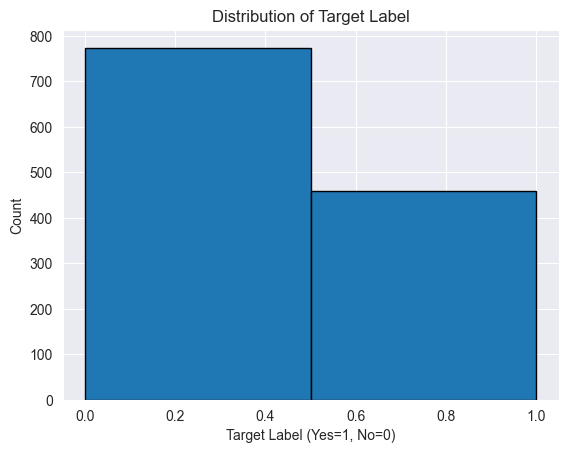

In [73]:
# Plot the distribution of values in the 'target label / yes no' column
plt.hist(preprocessed_df['target label / yes no'], bins=2, edgecolor='black')
plt.xlabel('Target Label (Yes=1, No=0)')
plt.ylabel('Count')
plt.title('Distribution of Target Label')
plt.show()


# Interesting pair Interpretation

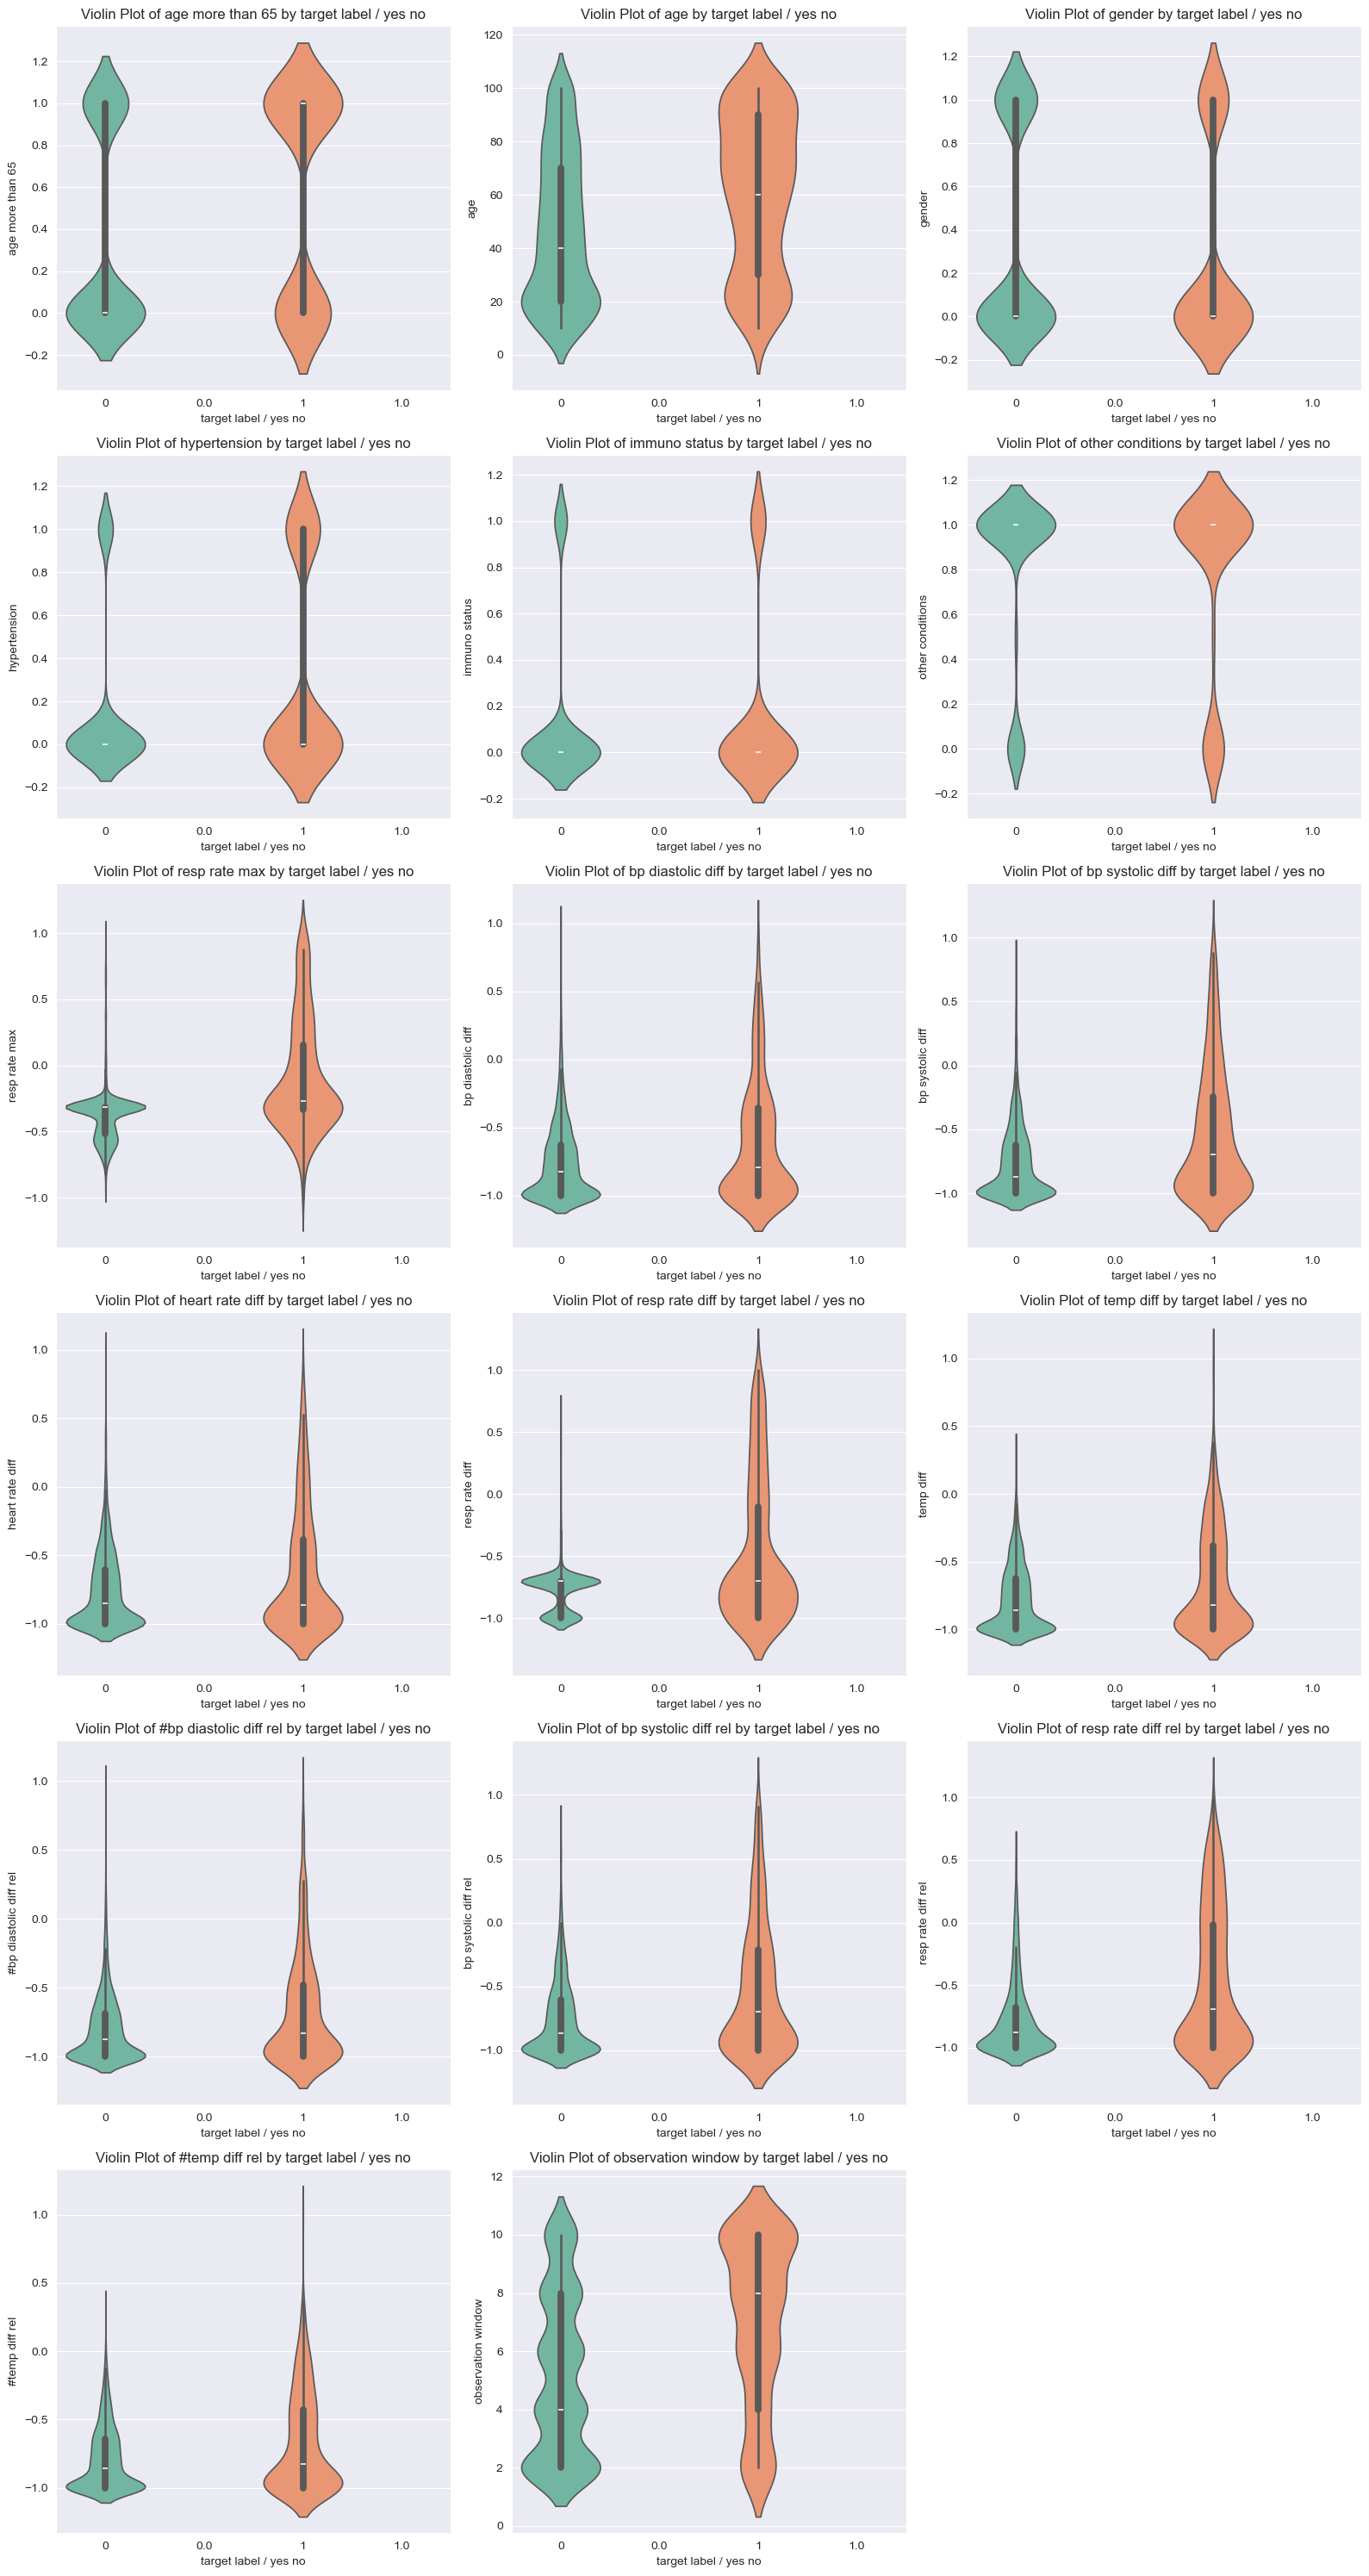

In [82]:
def plot_violin_with_subplots(df, target_column):

    cols = [col for col in df.columns if col != target_column]
    
    n_cols = 3
    n_rows = (len(cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.violinplot(x=df[target_column], y=df[col], hue=df[target_column], palette='Set2', ax=axes[i], legend=False)
        axes[i].set_title(f'Violin Plot of {col} by {target_column}')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(col)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_violin_with_subplots(preprocessed_df, 'target label / yes no')


## Age More Than 65 vs Target

- patients were more often above 65, in comparison to non patient ones

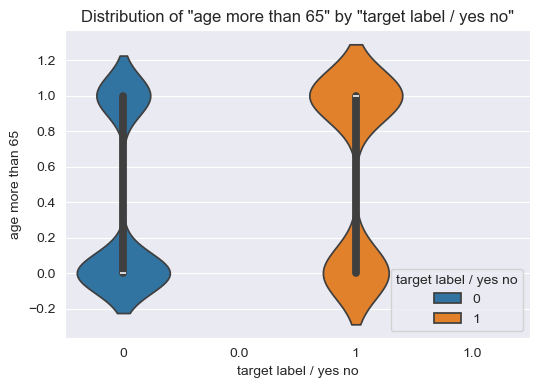

In [72]:
x = 'target label / yes no'
y = 'age more than 65'

plt.figure(figsize=(6, 4))
sns.violinplot(x=x, y=y, hue=x, data=preprocessed_df)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Distribution of "{y}" by "{x}"')

plt.show()

## Age Vs Target
- people with higher ages had more chance to have positive outcome on crona

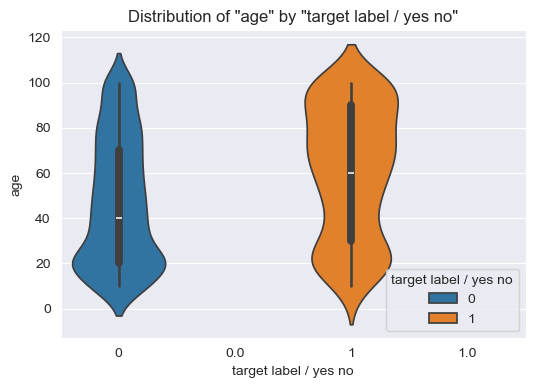

In [73]:
x = 'target label / yes no'
y = 'age'

plt.figure(figsize=(6, 4))
sns.violinplot(x=x, y=y, hue=x, data=preprocessed_df)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Distribution of "{y}" by "{x}"')

plt.show()

## Hypertension vs Target
- hypertension's were registered by patient ones

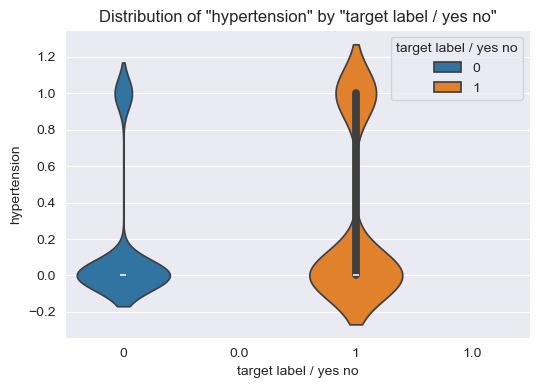

In [78]:
x = 'target label / yes no'
y = 'hypertension'

plt.figure(figsize=(6, 4))
sns.violinplot(x=x, y=y, hue=x, data=preprocessed_df)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Distribution of "{y}" by "{x}"')

plt.show()

## Resp, Temp, Blood Pressure rates vs Target

- these metrics tend to be a bit higher on average in patients

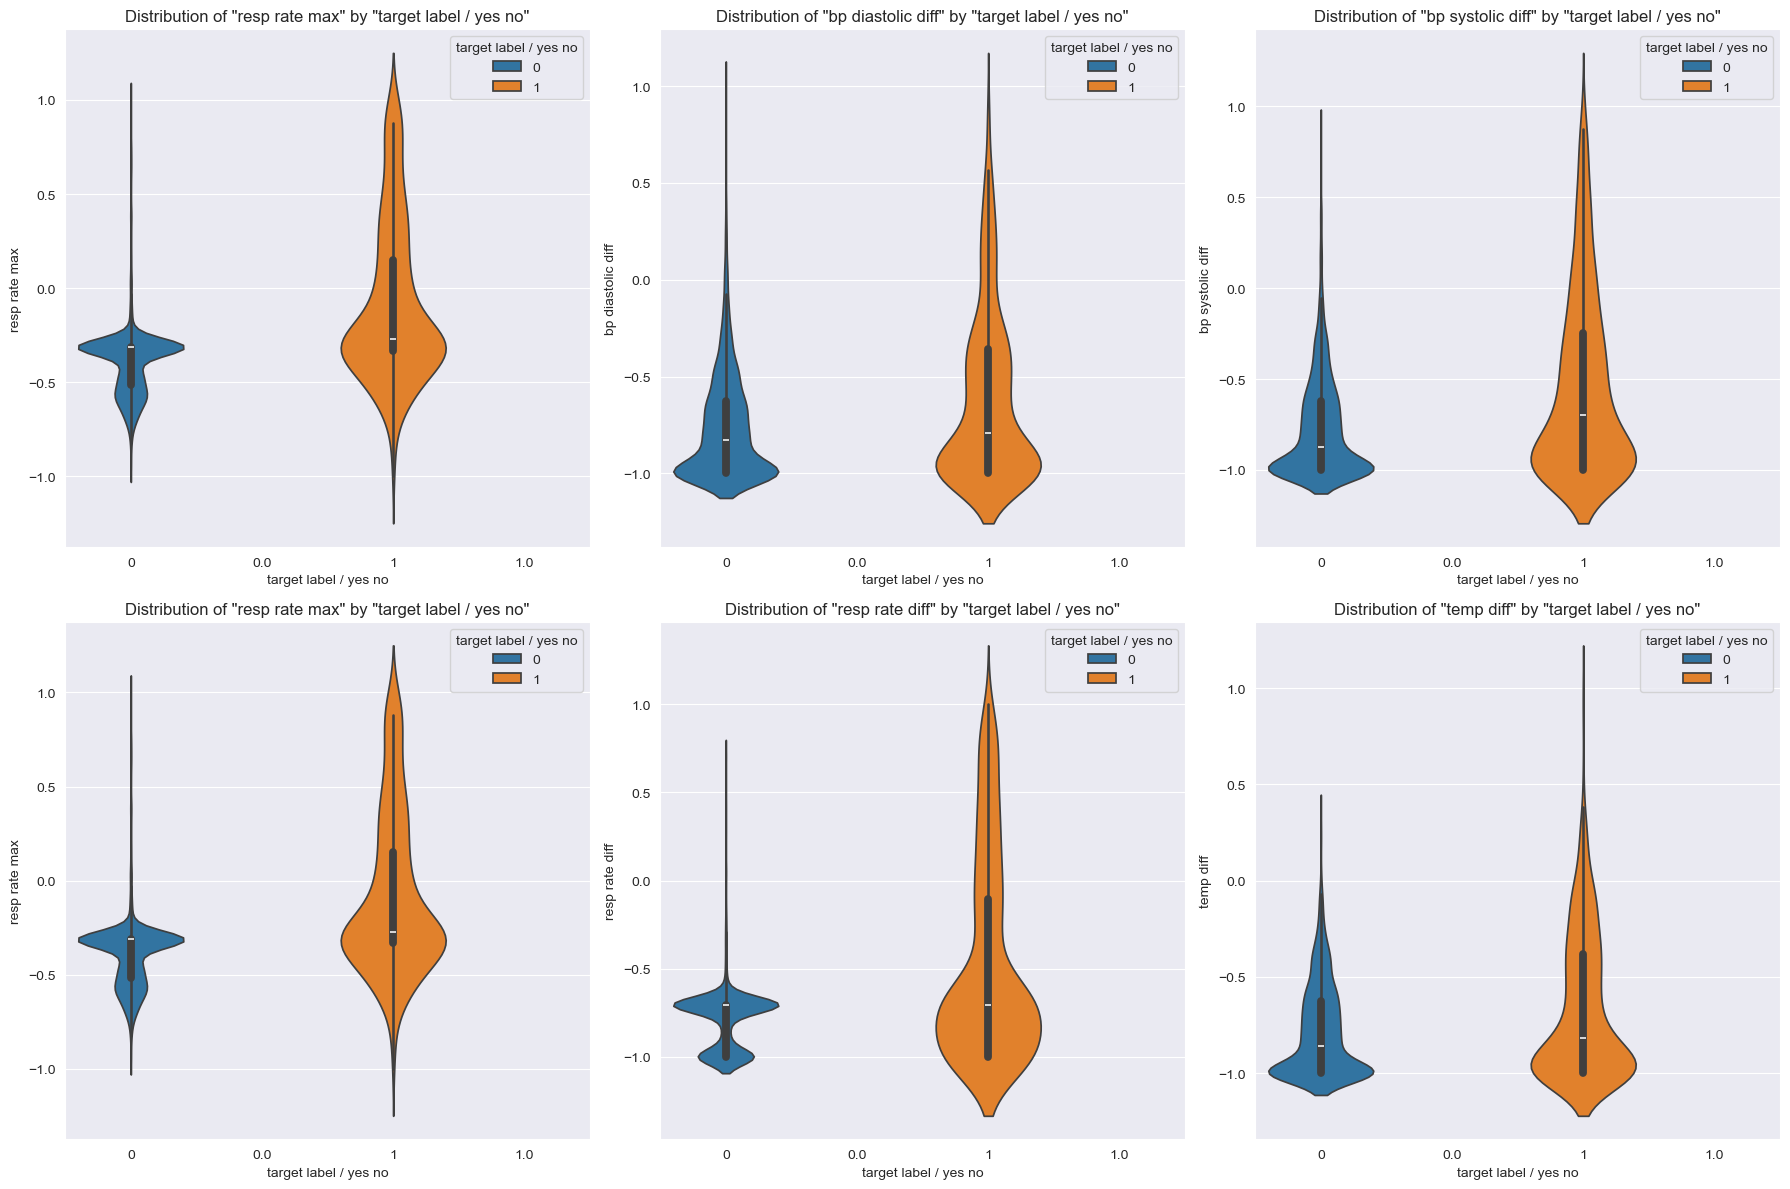

In [83]:
y_list = ['resp rate max', 'bp diastolic diff', 'bp systolic diff', 'resp rate max', 'resp rate diff', 'temp diff']

# Create a 2x3 grid of subplots (6 subplots total)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop through the list of y variables and subplots
for i, (y, ax) in enumerate(zip(y_list, axes.flat)):
    sns.violinplot(x='target label / yes no', y=y, hue='target label / yes no', data=preprocessed_df, ax=ax)
    
    # Set labels and title for each subplot
    ax.set_xlabel('target label / yes no')
    ax.set_ylabel(y)
    ax.set_title(f'Distribution of "{y}" by "target label / yes no"')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Observation vs Target
- Observation windows with more weeks tend to have more positive patients

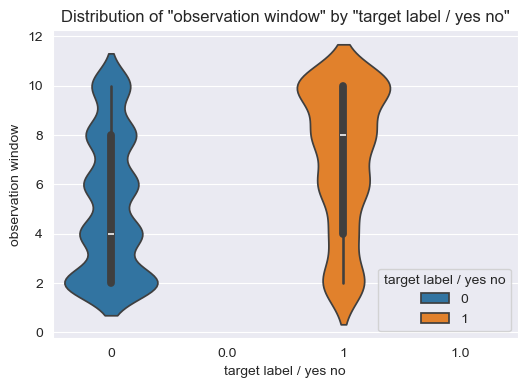

In [84]:
x = 'target label / yes no'
y = 'observation window'

plt.figure(figsize=(6, 4))
sns.violinplot(x=x, y=y, hue=x, data=preprocessed_df)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Distribution of "{y}" by "{x}"')

plt.show()